# U.S. Medical Insurance Costs

In [666]:
# Importing  Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import trim_mean
from matplotlib import pyplot as plt

In [667]:
# Importing data 
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [668]:
# Checking if our dataset contains any null value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [669]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [670]:
# Categorising our data 
bmi = df["bmi"]
cond_list = [bmi < 18.5, bmi < 25, bmi < 30, bmi >= 30]
choice_list = ["Underweight", "Healthy", "Overweight", "Obese"]
df["bmi_category"] = np.select(cond_list, choice_list)

age=df['age']
condition_list=[age<=25, age<=40, age<=60, age>60]
choice_list = ["0-25", "26-40", "41-60", "60+"]
df["age_group"] = np.select(condition_list, choice_list)

charges=df['charges']
condition_list=[charges<10000,charges<20000,charges<30000,charges>30000]
choice_list = ["0 - 10k $", "10k - 20k $", "20k - 30k $", ">30k"]
df["charges_range"] = np.select(condition_list, choice_list)

In [671]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_group,charges_range
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,0-25,10k - 20k $
1,18,male,33.770,1,no,southeast,1725.55230,Obese,0-25,0 - 10k $
2,28,male,33.000,3,no,southeast,4449.46200,Obese,26-40,0 - 10k $
3,33,male,22.705,0,no,northwest,21984.47061,Healthy,26-40,20k - 30k $
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,26-40,0 - 10k $


# Analysis on Region

There are people from 4 different regions ['southwest' 'southeast' 'northwest' 'northeast'], 
and by the looks of it, the Ratio of people from each region is almost similar: 
southeast    27.2%
southwest    24.3%
northwest    24.3%
northeast    24.2%
Name: region, dtype: object 

Avg Cost of Insurance of people from different region is 
region
southeast    14735.41
northeast    13406.38
northwest    12417.58
southwest    12346.94
Name: charges, dtype: float64



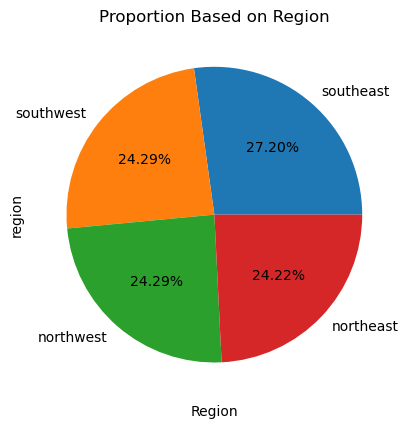

In [673]:
 print(f'''There are people from 4 different regions {df.region.unique()}, 
and by the looks of it, the Ratio of people from each region is almost similar: 
{df['region'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'} 

Avg Cost of Insurance of people from different region is 
{df.groupby(['region']).charges.mean().round(2).sort_values(ascending=False)}
''')


df['region'].value_counts().round(2).plot(kind='pie', autopct='%1.2f%%')
plt.title('Proportion Based on Region')
plt.xlabel('Region')
plt.show()

In [726]:
smokers_in_different_regions=df.groupby(['region','smoker']).age.size().unstack()

smokers_in_different_regions

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


# Analysis on Age 

In [735]:
# Min and Max age in this 
print(f'Min Age in this dataset is {df.age.min()}, and Max Age is {df.age.max()}')

Min Age in this dataset is 18, and Max Age is 64


In [678]:
# Avg insurance cost in based on age group
df.groupby(['age_group']).charges.mean().round(2).sort_values(ascending=False)

age_group
60+      21063.16
41-60    15888.76
26-40    11096.68
0-25      9087.02
Name: charges, dtype: float64

Ratio of peole based on age groups
0-25     22.9%
26-40    29.5%
41-60    40.8%
60+       6.8%
Name: age_group, dtype: object

smoker       no   yes
age_group            
0-25       0.79  0.21
26-40      0.79  0.21
41-60      0.81  0.19
60+        0.76  0.24


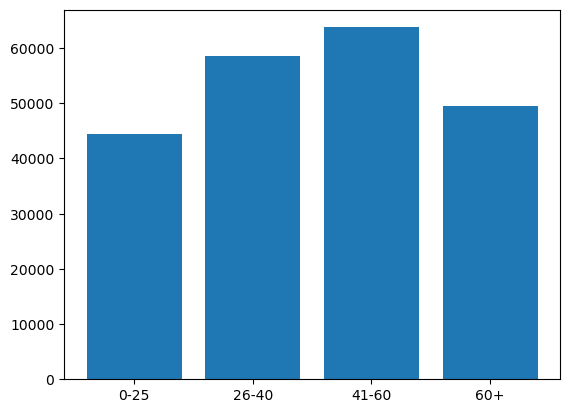

As age increases, insurance cost also increase.


In [700]:
# Can make a pie chart for this 
print('Ratio of peole based on age groups')
print(df['age_group'].value_counts(normalize=True)[df.age_group.unique()].mul(100).round(1).astype(str) + '%') 
print()

age_group_and_smokers=df.groupby(['age_group']\
                                ).smoker.value_counts(normalize=True).round(2).unstack()
print(age_group_and_smokers)

# # bar chart ot check if age and charges .sum
# plt.bar(df['age_group'],df['charges'])
# plt.show()

# print('As age increases, insurance cost also increase.')

# Analysis on sex

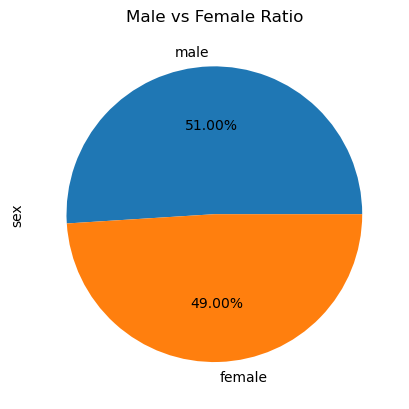

In [708]:
# Ratio of male and female in the data set, can make a pie chart for this 
df['sex'].value_counts(normalize=True).round(2).plot(kind='pie', autopct='%1.2f%%')
plt.title('Male vs Female Ratio')
plt.show()

In [681]:
# Sex based on region 
sex_and_age_group=df.groupby(['sex','age_group']).age.size().reset_index()
sex_and_age_group_pivot=sex_and_age_group.pivot(columns='age_group',index='sex',values='age').reset_index()
sex_and_age_group_pivot

age_group,sex,0-25,26-40,41-60,60+
0,female,147,194,274,47
1,male,159,201,272,44


In [682]:
# Sex based on region 
sex_and_region=df.groupby(['region','sex']).age.size().reset_index()
sex_and_region_pivot=sex_and_region.pivot(columns='sex',index='region',values='age')
sex_and_region_pivot

sex,female,male
region,,
northeast,161,163
northwest,164,161
southeast,175,189
southwest,162,163


In [683]:
df.groupby(['smoker','sex']).age.count().unstack(fill_value=0)

sex,female,male
smoker,,
no,547,517
yes,115,159


In [684]:
# Insurance cost based on Sex 
df.groupby(['sex']).charges.mean().round(2).sort_values(ascending=False)

sex
male      13956.75
female    12569.58
Name: charges, dtype: float64

# Analysis on BMI 

Avg BMI of a person is 30.66339686098655


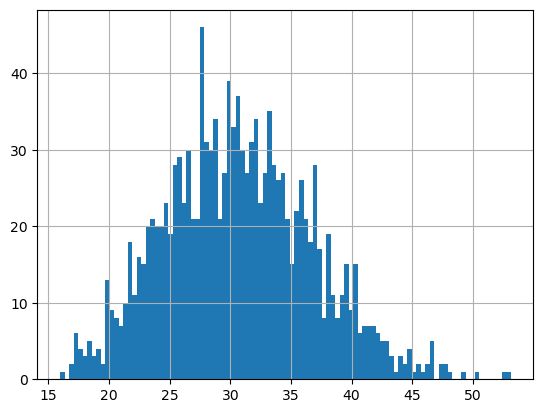

In [742]:
print(f'Avg BMI of a person is {df.bmi.mean()}')
df['bmi'].hist(bins=100)
plt.show()



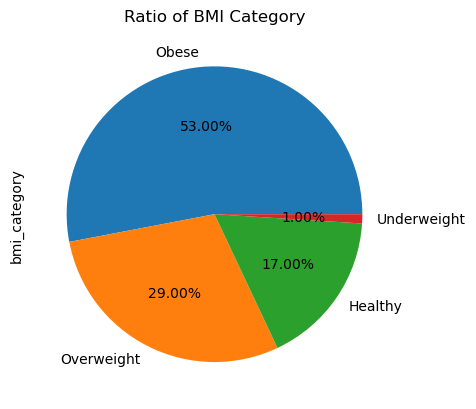

In [707]:
df['bmi_category']=pd.Categorical(df['bmi_category'],['Underweight','Healthy','Overweight','Obese'])
df['bmi_category'].value_counts(normalize=True).round(2).plot(kind='pie',autopct='%1.2f%%')


plt.title('Ratio of BMI Category')
plt.show()

In [686]:
# Number of famle and female based on BMI Category
df.groupby(['bmi_category','sex']).age.count().unstack(fill_value=0).sort_values(by='bmi_category', ascending=True)

sex,female,male
bmi_category,,
Underweight,12,8
Healthy,117,108
Overweight,199,187
Obese,334,373


# Analysis on Insurance Cost

Avg Insurance cost is 13270.422265141257, Median Insurance cost is 9382.033, and
Trimmed mean of Insurance cost is 9877.310386652985



<Axes: xlabel='charges'>

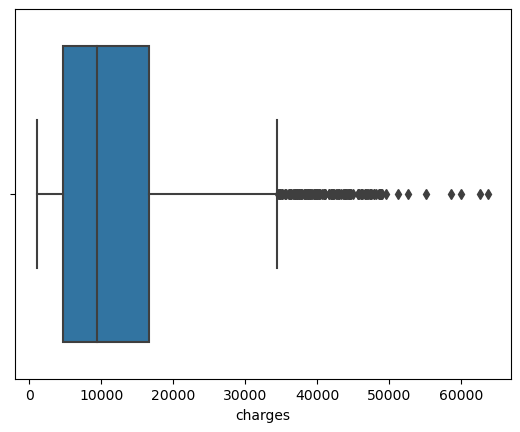

In [687]:
trmean_budget=trim_mean(df.charges,proportiontocut=0.2)


print(f'''Avg Insurance cost is {(df.charges.mean())}, Median Insurance cost is {df.charges.median()}, and
Trimmed mean of Insurance cost is {trmean_budget}
''')

sns.boxplot(data=df,x=df["charges"])

In [688]:
# Insurance cost based on BMI Category
df.groupby(['bmi_category']).charges.mean().sort_values( ascending=True)

bmi_category
Underweight     8852.200585
Healthy        10409.337709
Overweight     10987.509891
Obese          15552.335469
Name: charges, dtype: float64

In [690]:
# Number of smokers
df.groupby(['smoker']).age.size().round(2).sort_values(ascending=False)

smoker
no     1064
yes     274
Name: age, dtype: int64

In [689]:
# Insurance cost based on Smokers 
df.groupby(['smoker']).charges.mean().round(2).sort_values(ascending=False)

smoker
yes    32050.23
no      8434.27
Name: charges, dtype: float64

In [691]:
# Avg insurance cost based on sex and age group
df.groupby(['age_group','sex']).charges.mean().round(2).unstack(fill_value=0)

sex,female,male
age_group,,
0-25,8573.73,9561.57
26-40,10135.87,12024.03
41-60,14975.07,16809.17
60+,21089.27,21035.28


# Analysis on Children 

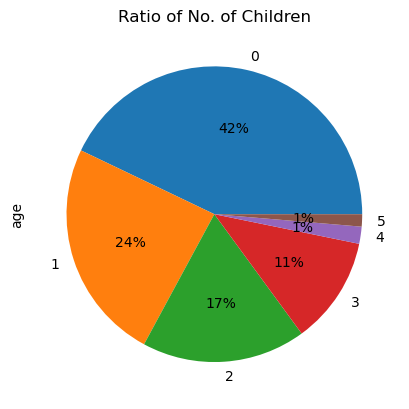

In [706]:
df.groupby(['children']).age.count().plot(kind='pie', autopct='%1d%%')
plt.title('Ratio of No. of Children')
plt.show()

   children   charges
0         0  12365.98
1         1  12731.17
2         2  15073.56
3         3  15355.32
4         4  13850.66
5         5   8786.04


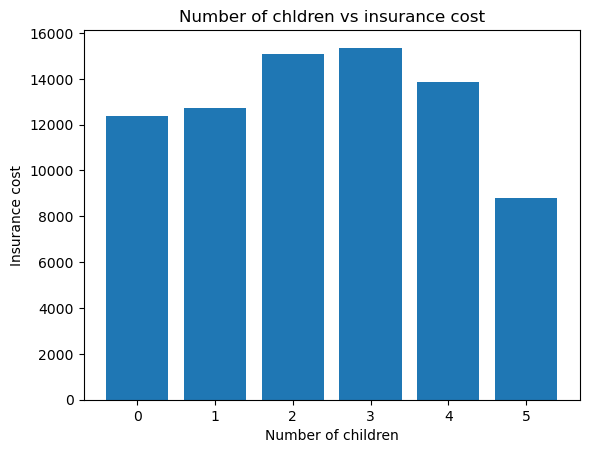

In [727]:
# Avg cost of Insurance based on the number of children
insurance_cost_based_on_children=df.groupby(['children']).charges.mean().round(2).reset_index()
print(insurance_cost_based_on_children)

list_of_charges=insurance_cost_based_on_children.values.tolist()
charges_list=[]
for i in range(len(list_of_charges)):
    charges_list.append(list_of_charges[i][1])

plt.bar(range(len(charges_list)), charges_list)
# sns.barplot(x="children", y="charges", data = df)
plt.title('Number of chldren vs insurance cost')
plt.xlabel('Number of children')
plt.ylabel('Insurance cost')
plt.show()

In [731]:
# Avg insurance cost based on the No. of Children and smoking habits
groupby_children=df.groupby(['children','smoker']).charges.mean().round(2).reset_index()
groupby_children_pivot=groupby_children.pivot(columns='children',index='smoker',values='charges').reset_index()
groupby_children_pivot

children,smoker,0,1,2,3,4,5
0,no,7611.79,8303.11,9493.09,9614.52,12121.34,8183.85
1,yes,31341.36,31822.65,33844.24,32724.92,26532.28,19023.26


In [733]:
# No of Children Based on Age groups
df.groupby(['age_group']).children.count().reset_index()

,age_group,children
0,0-25,306
1,26-40,395
2,41-60,546
3,60+,91


In [695]:
# Number of children based on age group 
df.groupby(['age_group','children']).age.count().unstack(fill_value=0)

children,0,1,2,3,4,5
age_group,,,,,,
0-25,200,48,31,18,5,4
26-40,109,118,92,58,10,8
41-60,204,147,108,72,9,6
60+,61,11,9,9,1,0


In [696]:
# number of children based on sex  
df.groupby(['sex','age_group','children']).age.count().unstack(fill_value=0)

children            0   1   2   3  4  5
sex    age_group                       
female 0-25       100  20  16   8  1  2
       26-40       58  57  41  30  4  4
       41-60       99  77  56  35  5  2
       60+         32   4   6   4  1  0
male   0-25       100  28  15  10  4  2
       26-40       51  61  51  28  6  4
       41-60      105  70  52  37  4  4
       60+         29   7   3   5  0  0

# Findings

1. Northwest has the lowest Avg insurace cost compared to other regions.
2. Southeast has highest number of smokers compared to all four regions.
3. Most people in this data are between the age of 40-60 which covers almost 40% of the dataset
4. Almost 25% of the people who smoke are above the age of 60. While people between 41-60 age smoke the least at just 19%.
5. Equal distribution between M/F. 
6. Compared to females, men smoke more 
7. Insurance cost for male is sligtgly higher compared to female.
8. More than 50% of the people in this dataset are obese.
9. We can see there are outliers in Charges.
10. Obese poeple pay the hightest insurance cost.
11. People above the age of 60 pay the most for insurance.
12. Only about 20% of the people smoke. However, this ratio is not the same when it comes to avg insurace cost. As smokers tend to pay almost 3.5 time more compared to non-smokers. 
13. 42% of the people are with 0 kids.
14. People with 3 kids pay the most for insurace.However, parent with 5 kids pay the least.